In [1]:
import pandas as pd
import numpy as np
import scipy.optimize as op
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [3]:
train = pd.read_csv (r"C:\Users\admin\Desktop\Datasets\Titanic_Kaggle\train.csv")
test = pd.read_csv (r"C:\Users\admin\Desktop\Datasets\Titanic_Kaggle\test.csv")

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


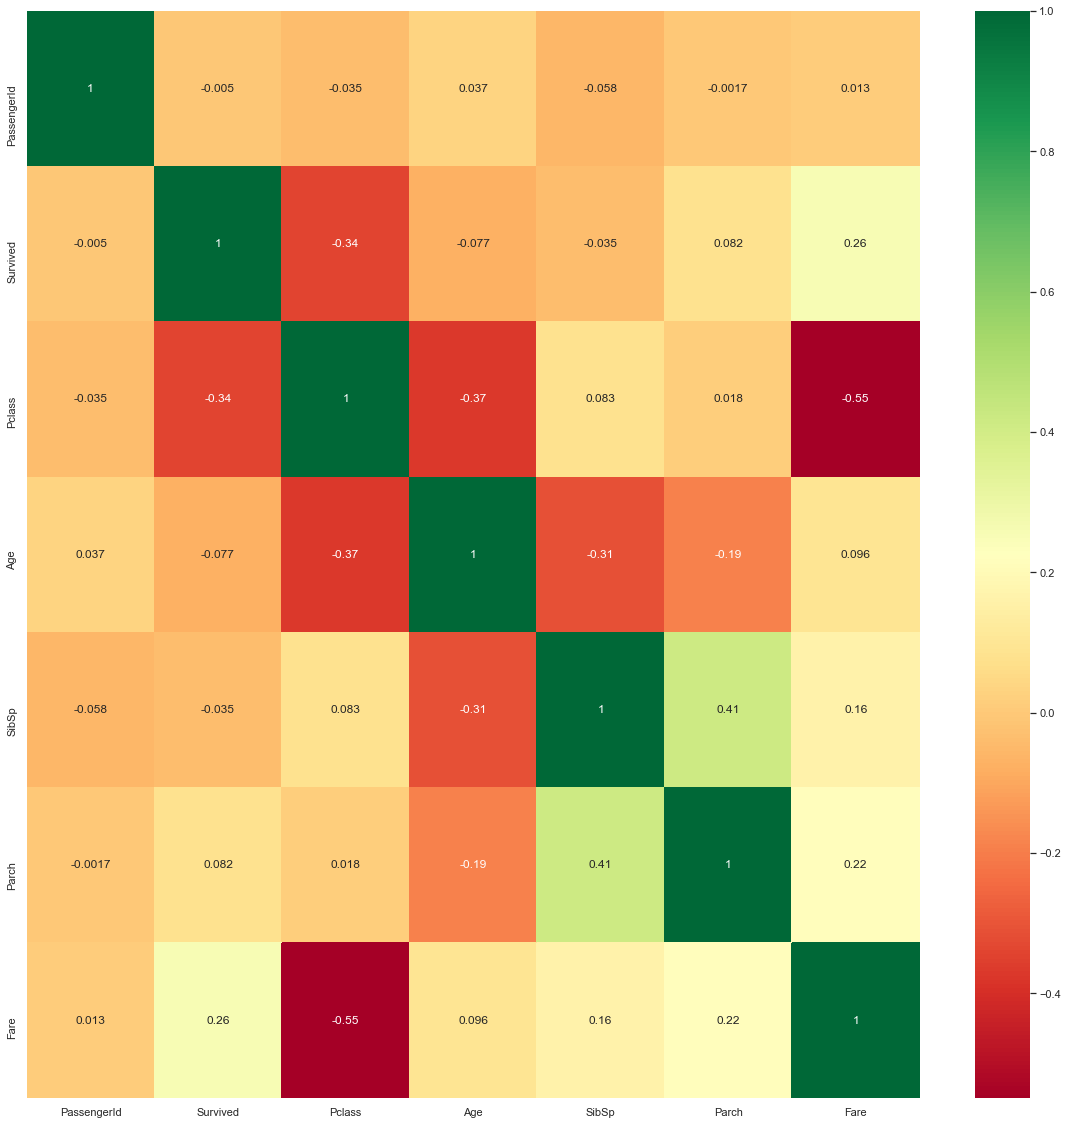

In [6]:
# Showing Correlation

corrmat = train.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [7]:
# Data Plotting

def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

The Chart confirms Women more likely survivied than Men


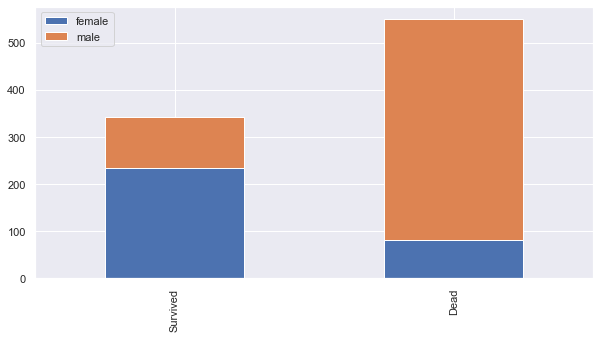

In [8]:
bar_chart('Sex')
print ("The Chart confirms Women more likely survivied than Men")

The Chart confirms 1st class more likely survivied than other classes
The Chart confirms 3rd class more likely dead than other classes


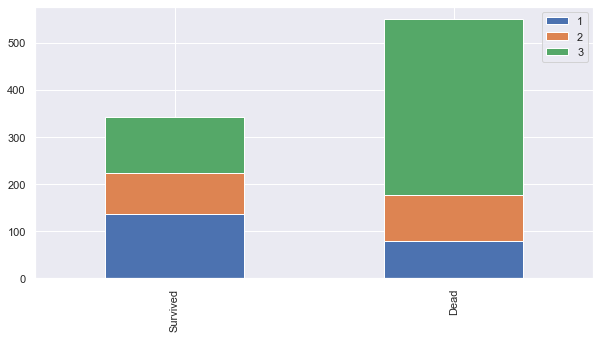

In [9]:
print("The Chart confirms 1st class more likely survivied than other classes")
print("The Chart confirms 3rd class more likely dead than other classes")
bar_chart('Pclass')

The Chart confirms a person aboarded with more than 2 siblings or spouse more likely survived
The Chart confirms a person aboarded without siblings or spouse more likely dead


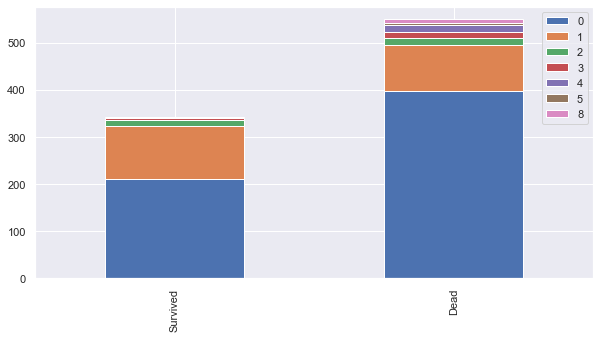

In [10]:
print ("The Chart confirms a person aboarded with more than 2 siblings or spouse more likely survived")
print ("The Chart confirms a person aboarded without siblings or spouse more likely dead")
bar_chart('SibSp')

The Chart confirms a person aboarded with more than 2 parents or children more likely survived
The Chart confirms a person aboarded alone more likely dead


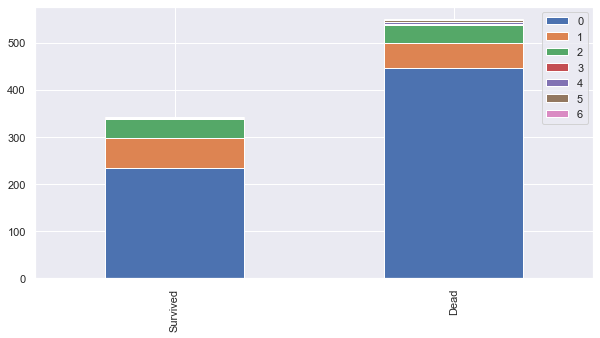

In [11]:
print ("The Chart confirms a person aboarded with more than 2 parents or children more likely survived")
print ("The Chart confirms a person aboarded alone more likely dead")
bar_chart('Parch')

The Chart confirms a person aboarded from C slightly more likely survived
The Chart confirms a person aboarded from Q more likely dead
The Chart confirms a person aboarded from S more likely dead


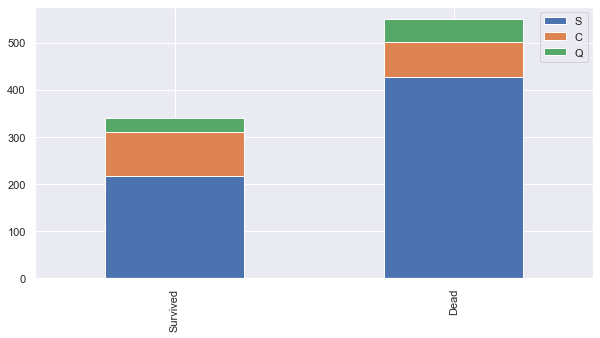

In [12]:
print ("The Chart confirms a person aboarded from C slightly more likely survived")
print ("The Chart confirms a person aboarded from Q more likely dead")
print ("The Chart confirms a person aboarded from S more likely dead")
bar_chart('Embarked')

In [13]:
# Feature Engineering 

In [14]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [16]:
# Title and Name Data Cleaning

In [17]:
train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test['Title'] = test['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [18]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [19]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs


In [20]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Don           1
Lady          1
Capt          1
Jonkheer      1
Sir           1
Mme           1
Countess      1
Name: Title, dtype: int64

In [21]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dr          1
Dona        1
Ms          1
Name: Title, dtype: int64

In [22]:
#title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, 
#                 "Master": 4, "Dr": 4, "Rev": 4, "Col": 4, "Major": 4, "Mlle": 4,"Countess": 4,
#                 "Ms": 4, "Lady": 4, "Jonkheer": 4, "Don": 4, "Dona" : 4, "Mme": 4,"Capt": 4,"Sir": 4 }
#
#train['Title'] = train['Title'].map(title_mapping)
#test['Title'] = test['Title'].map(title_mapping)

In [23]:
# A new column "Title" is added

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [24]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs


Dr,Captains etc are more likely to survive 


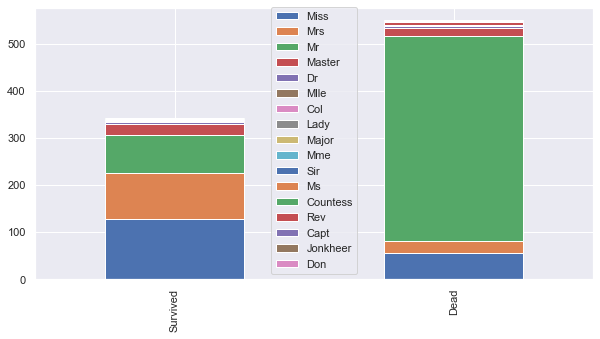

In [25]:
print ("Dr,Captains etc are more likely to survive ")
bar_chart('Title')

In [26]:
train["Title"].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Don           1
Lady          1
Capt          1
Jonkheer      1
Sir           1
Mme           1
Countess      1
Name: Title, dtype: int64

In [27]:
test["Title"].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dr          1
Dona        1
Ms          1
Name: Title, dtype: int64

In [28]:
train.drop(["Name"] , inplace=True , axis=1)
test.drop(["Name"] , inplace=True , axis=1)

In [29]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [30]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,Mr
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,Mrs


In [31]:
# Age data cleaning

In [32]:
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)

In [33]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [34]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,Mr
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,Mrs


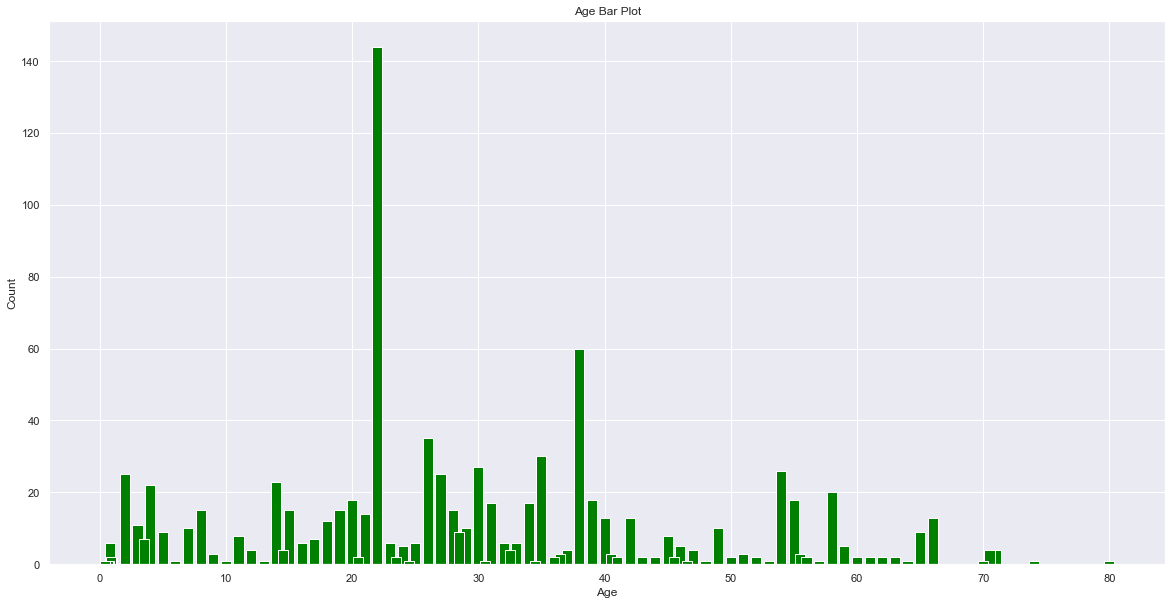

In [35]:
# Age Graph

#Bar Graph
age = train["Age"].unique()
num = list(train["Age"].value_counts())

fig = plt.figure(figsize=(20,10))
plt.bar(age,num,color='green')
plt.title ("Age Bar Plot")
plt.xlabel ("Age")
plt.ylabel ("Count")
plt.grid(True)
plt.show()

In [36]:
# Binning/Converting Numerical Age to Categorical Variable

# feature vector map:
# child: 0 (age <= 10)
# young: 1 (10 < age <= 22)
# adult: 2 (22 < age <= 36)
# mid-age: 3 (36 < age <= 50)
# senior: 4 (age > 50)

In [37]:
train['Age'].fillna((train['Age'].median()), inplace=True)
test['Age'].fillna((test['Age'].median()), inplace=True)

In [38]:
bins = [0 , 10 , 22 , 36 , 50 , 100]
category_age = [1 , 2 , 3 , 4 , 5]

train["age_category"] = pd.cut(train["Age"] , bins , labels = category_age)
test["age_category"] = pd.cut(test["Age"] , bins , labels = category_age)

train.drop(["Age"] , inplace=True , axis=1)
test.drop(["Age"] , inplace=True , axis=1)

train.rename(columns={"age_category":"Age"}, inplace=True)
test.rename(columns={"age_category":"Age"}, inplace=True)

In [39]:
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age
0,1,0,3,male,1,0,A/5 21171,7.2500,NaN,S,Mr,2
1,2,1,1,female,1,0,PC 17599,71.2833,C85,C,Mrs,4
2,3,1,3,female,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,3
3,4,1,1,female,1,0,113803,53.1000,C123,S,Mrs,3
4,5,0,3,male,0,0,373450,8.0500,NaN,S,Mr,3


In [40]:
test.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age
0,892,3,male,0,0,330911,7.8292,NaN,Q,Mr,3
1,893,3,female,1,0,363272,7.0000,NaN,S,Mrs,4
2,894,2,male,0,0,240276,9.6875,NaN,Q,Mr,5
3,895,3,male,0,0,315154,8.6625,NaN,S,Mr,3
4,896,3,female,1,1,3101298,12.2875,NaN,S,Mrs,2


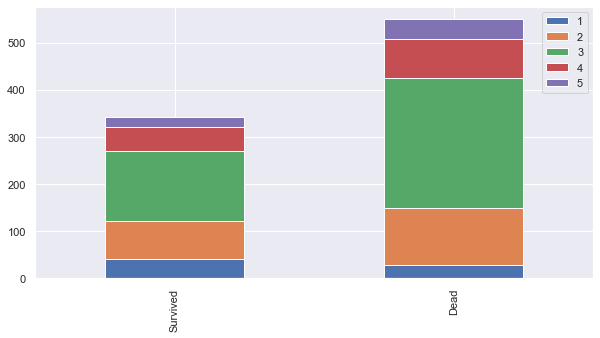

In [41]:
bar_chart("Age")

In [42]:
# Embarked data cleaning

In [43]:
train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [44]:
test["Embarked"].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [45]:
train["Embarked"].fillna ("S", inplace=True)
test["Embarked"].fillna ("S", inplace=True)

In [46]:
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age
0,1,0,3,male,1,0,A/5 21171,7.2500,NaN,S,Mr,2
1,2,1,1,female,1,0,PC 17599,71.2833,C85,C,Mrs,4
2,3,1,3,female,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,3
3,4,1,1,female,1,0,113803,53.1000,C123,S,Mrs,3
4,5,0,3,male,0,0,373450,8.0500,NaN,S,Mr,3


In [47]:
test.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age
0,892,3,male,0,0,330911,7.8292,NaN,Q,Mr,3
1,893,3,female,1,0,363272,7.0000,NaN,S,Mrs,4
2,894,2,male,0,0,240276,9.6875,NaN,Q,Mr,5
3,895,3,male,0,0,315154,8.6625,NaN,S,Mr,3
4,896,3,female,1,1,3101298,12.2875,NaN,S,Mrs,2


In [48]:
# Fare data cleaning with median fare for each Pclass

In [49]:
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)

In [50]:
# Cabin data cleaning

In [51]:
train["Cabin"].value_counts()

C23 C25 C27    4
B96 B98        4
G6             4
E101           3
D              3
              ..
C106           1
C103           1
A10            1
B78            1
B73            1
Name: Cabin, Length: 147, dtype: int64

In [52]:
test["Cabin"].value_counts()

B57 B59 B63 B66    3
C78                2
C31                2
C89                2
B45                2
                  ..
C39                1
G6                 1
D19                1
B71                1
C62 C64            1
Name: Cabin, Length: 76, dtype: int64

In [53]:
train['Cabin'] = train['Cabin'].str[:1]
test['Cabin'] = test['Cabin'].str[:1]

In [54]:
train["Cabin"].fillna("C" , inplace=True)
test["Cabin"].fillna("C" , inplace=True)

In [55]:
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age
0,1,0,3,male,1,0,A/5 21171,7.2500,C,S,Mr,2
1,2,1,1,female,1,0,PC 17599,71.2833,C,C,Mrs,4
2,3,1,3,female,0,0,STON/O2. 3101282,7.9250,C,S,Miss,3
3,4,1,1,female,1,0,113803,53.1000,C,S,Mrs,3
4,5,0,3,male,0,0,373450,8.0500,C,S,Mr,3


In [56]:
test.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age
0,892,3,male,0,0,330911,7.8292,C,Q,Mr,3
1,893,3,female,1,0,363272,7.0000,C,S,Mrs,4
2,894,2,male,0,0,240276,9.6875,C,Q,Mr,5
3,895,3,male,0,0,315154,8.6625,C,S,Mr,3
4,896,3,female,1,1,3101298,12.2875,C,S,Mrs,2


In [57]:
# SibSp and Parch Size Data Cleaning and creating a new column "FamilySize"
# SibSp --> Number of siblings / spouses (husband/wife) aboard the Titanic
# Parch --> Number of parents / children aboard the Titanic

In [58]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

In [59]:
train["FamilySize"].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: FamilySize, dtype: int64

In [60]:
test["FamilySize"].value_counts()

1     253
2      74
3      57
4      14
5       7
11      4
7       4
6       3
8       2
Name: FamilySize, dtype: int64

In [61]:
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age,FamilySize
0,1,0,3,male,1,0,A/5 21171,7.2500,C,S,Mr,2,2
1,2,1,1,female,1,0,PC 17599,71.2833,C,C,Mrs,4,2
2,3,1,3,female,0,0,STON/O2. 3101282,7.9250,C,S,Miss,3,1
3,4,1,1,female,1,0,113803,53.1000,C,S,Mrs,3,2
4,5,0,3,male,0,0,373450,8.0500,C,S,Mr,3,1


In [62]:
test.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age,FamilySize
0,892,3,male,0,0,330911,7.8292,C,Q,Mr,3,1
1,893,3,female,1,0,363272,7.0000,C,S,Mrs,4,2
2,894,2,male,0,0,240276,9.6875,C,Q,Mr,5,1
3,895,3,male,0,0,315154,8.6625,C,S,Mr,3,1
4,896,3,female,1,1,3101298,12.2875,C,S,Mrs,2,3


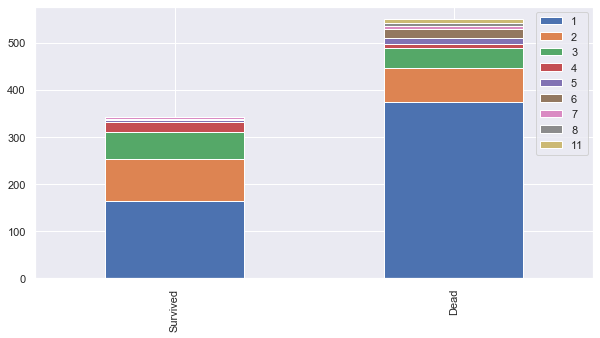

In [77]:
bar_chart("FamilySize")

In [63]:
train.drop(['Ticket' , "PassengerId"], axis=1 , inplace=True)
test.drop(['Ticket' , "PassengerId"], axis=1 , inplace=True)

In [64]:
train.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Cabin,Embarked,Title,Age,FamilySize
0,0,3,male,1,0,7.2500,C,S,Mr,2,2
1,1,1,female,1,0,71.2833,C,C,Mrs,4,2
2,1,3,female,0,0,7.9250,C,S,Miss,3,1
3,1,1,female,1,0,53.1000,C,S,Mrs,3,2
4,0,3,male,0,0,8.0500,C,S,Mr,3,1


In [65]:
test.head()

,Pclass,Sex,SibSp,Parch,Fare,Cabin,Embarked,Title,Age,FamilySize
0,3,male,0,0,7.8292,C,Q,Mr,3,1
1,3,female,1,0,7.0000,C,S,Mrs,4,2
2,2,male,0,0,9.6875,C,Q,Mr,5,1
3,3,male,0,0,8.6625,C,S,Mr,3,1
4,3,female,1,1,12.2875,C,S,Mrs,2,3


In [66]:
train.dtypes

Survived         int64
Pclass           int64
Sex             object
SibSp            int64
Parch            int64
Fare           float64
Cabin           object
Embarked        object
Title           object
Age           category
FamilySize       int64
dtype: object

In [67]:
test.dtypes

Pclass           int64
Sex             object
SibSp            int64
Parch            int64
Fare           float64
Cabin           object
Embarked        object
Title           object
Age           category
FamilySize       int64
dtype: object

In [68]:
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
SibSp         0
Parch         0
Fare          0
Cabin         0
Embarked      0
Title         0
Age           0
FamilySize    0
dtype: int64

In [69]:
test.isnull().sum()

Pclass        0
Sex           0
SibSp         0
Parch         0
Fare          0
Cabin         0
Embarked      0
Title         0
Age           0
FamilySize    0
dtype: int64

In [70]:
# Type Conversion

In [71]:
train["Age"] = train["Age"].astype(float)
test["Age"] = test["Age"].astype(float)

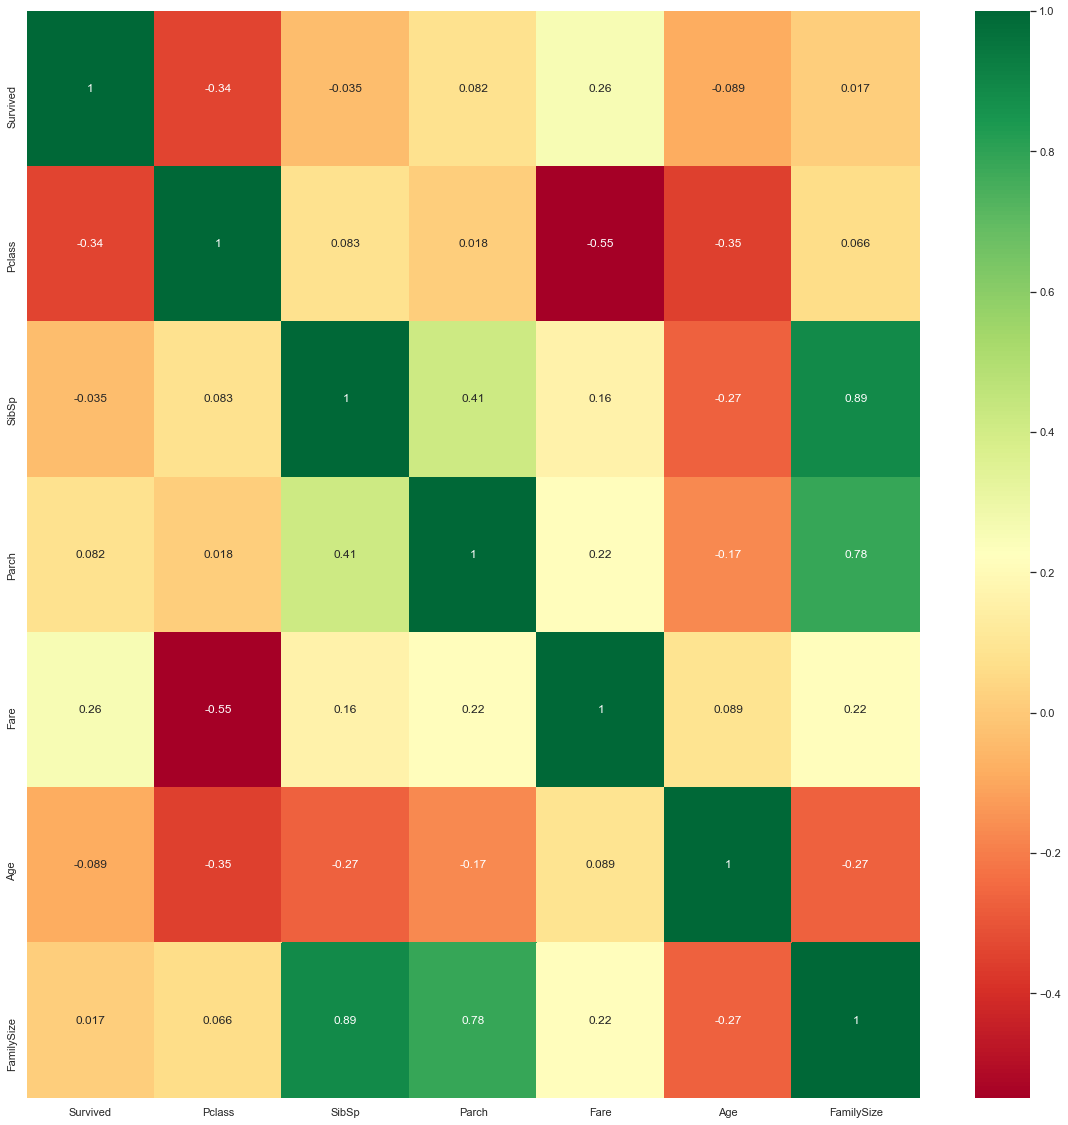

In [72]:
# Showing Correlation

corrmat = train.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(train[top_corr_features].corr(),annot=True,cmap="RdYlGn")
fig = g.get_figure()
fig.savefig(r"C:\Users\admin\Desktop\1.png")

In [73]:
#train.drop(["Parch" , "SibSp"] , axis=1 , inplace=True)
#test.drop(["Parch" , "SibSp"] , axis=1 , inplace=True)

In [74]:
train.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Cabin,Embarked,Title,Age,FamilySize
0,0,3,male,1,0,7.2500,C,S,Mr,2.0,2
1,1,1,female,1,0,71.2833,C,C,Mrs,4.0,2
2,1,3,female,0,0,7.9250,C,S,Miss,3.0,1
3,1,1,female,1,0,53.1000,C,S,Mrs,3.0,2
4,0,3,male,0,0,8.0500,C,S,Mr,3.0,1


In [75]:
test.head()

,Pclass,Sex,SibSp,Parch,Fare,Cabin,Embarked,Title,Age,FamilySize
0,3,male,0,0,7.8292,C,Q,Mr,3.0,1
1,3,female,1,0,7.0000,C,S,Mrs,4.0,2
2,2,male,0,0,9.6875,C,Q,Mr,5.0,1
3,3,male,0,0,8.6625,C,S,Mr,3.0,1
4,3,female,1,1,12.2875,C,S,Mrs,2.0,3


In [76]:
train.to_csv (r"C:\Users\admin\Desktop\Datasets\Titanic_Kaggle\train_clean1.csv", index = False, header=True)
test.to_csv (r"C:\Users\admin\Desktop\Datasets\Titanic_Kaggle\test_clean1.csv", index = False, header=True)